In [ ]:
# Assignment 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sample_data/Fish.csv")

In [ ]:
# Convert the species column to categorical variables
df = pd.get_dummies(df, columns=['Species'])

In [ ]:
target = 'Weight'
y = df[target]

In [ ]:
# extract the features as the remaining columns
X = df.drop(target, axis=1)

In [ ]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# handle missing values
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_train.mean())

In [ ]:
# Fit the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = reg.predict(X_test)

In [ ]:
# calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 7007.383189853871
R-squared Score: 0.9507352480054517


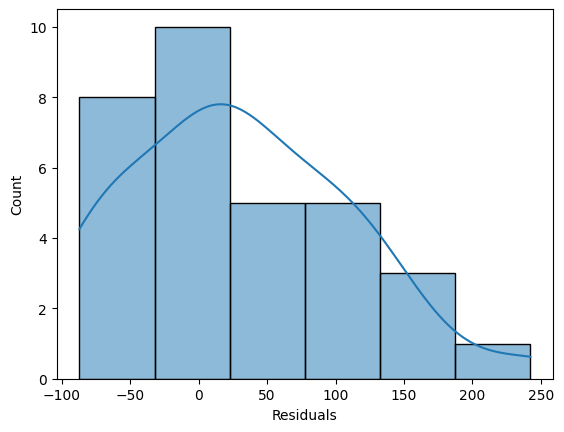

In [ ]:
# plot the distribution of residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.show()

In [ ]:
#Assignment 2

In [ ]:
#Build k-nn regression for it.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd

In [ ]:
# Load the dataset
df = pd.read_csv('/content/sample_data/Fish.csv')

In [ ]:
# Select the independent and dependent variables
X = df['Height'].values.reshape(-1, 1)
y = df['Weight'].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the KNN regressor with 5 neighbors
k = 5
knn = KNeighborsRegressor(n_neighbors=k)

In [ ]:
# Fit the model to the training data
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [ ]:
# Predict on the test data
y_pred = knn.predict(X_test)

ValueError: ignored

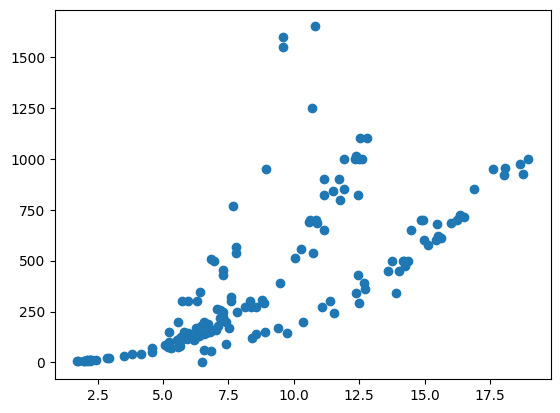

In [ ]:
# Plot the data points and the KNN regression line
fig, ax = plt.subplots()
ax.scatter(X, y, label='Actual')
ax.plot(X, y_pred.reshape(-1, 1), color='red', label='KNN Regression')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.legend()
plt.show()

In [ ]:
# Compare your results.

In [ ]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

Mean squared error: 31465.9854875


In [ ]:
print("R-squared score for KNN regression:", r2_score(y_test, y_pred))

R-squared score for KNN regression: 0.7787813325878546


In [ ]:
print("Accuracy:", knn.score(X_test, y_test))

Accuracy: 0.7787813325878546


In [ ]:
#Choose a binary variable in your data. If the only reasonable variable to work with is your target,
#split your target into two categories and work with a new variable.

In [ ]:
# Since my taget value is weight i am seperating my target value with threshold of weights
# which are higher than 500 and less than 500

In [ ]:
# Load the dataset
data = pd.read_csv('/content/sample_data/Fish.csv')

In [ ]:
# Create a new binary variable based on weight keep threshold as 500 for default
data['weight_category'] = data['Weight'].apply(lambda x: 1 if x >= 500 else 0)

In [ ]:
# Split the data into independent variables (X) and target variable (y)
X = data[['Height']]
y = data['weight_category']

In [ ]:
#Build logistic regression for your categoric variable.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a logistic regression object
logreg = LogisticRegression()

# Fit the logistic regression model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import recall_score, f1_score
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Recall:", recall)
print("F1 score:", f1)

Recall: 0.8666666666666667
F1 score: 0.9285714285714286


In [ ]:
#Choose threshold that maximizes recall  # Threshold = 600 gives maximum recall

In [ ]:
print("Recall:", recall)
print("F1 score:", f1)

Recall: 0.9166666666666666
F1 score: 0.8799999999999999


In [ ]:
#Choose threshold that maximizes F-1 score. # Threshold = 400 gives maximum F1 score

In [ ]:
print("Recall:", recall)
print("F1 score:", f1)

Recall: 0.9333333333333333
F1 score: 0.9655172413793104


In [ ]:
#  Final assignment for individual projects


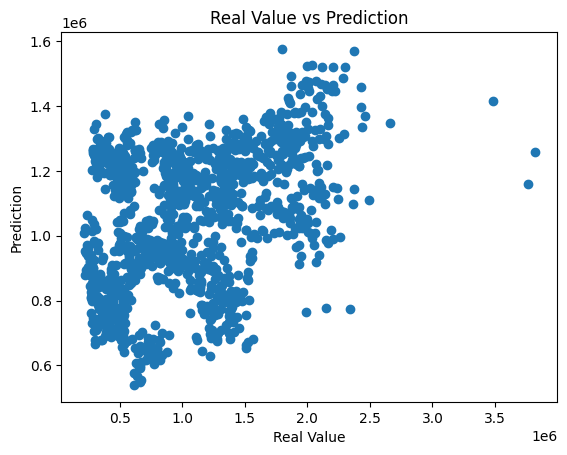

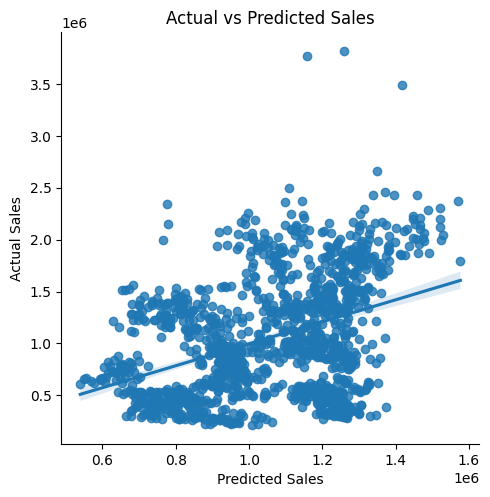

In [ ]:
# Separate the features (X) and target variable (y)
X = data.drop(['Weekly_Sales'], axis=1)
y = data['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Plot the real value vs prediction
plt.scatter(y_test, y_pred)
plt.xlabel('Real Value')
plt.ylabel('Prediction')
plt.title('Real Value vs Prediction')
plt.show()

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)


predictions = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
# # Plotting scatter plot of predicted vs actual values
# plt.scatter(y_pred, y_test, c='blue', label='Actual vs. Predicted')
# min_val = min(predictions['Actual Sales'])
# max_val = max(predictions['Actual Sales'])

# plt.plot([min_val, max_val], [min_val, max_val], color='red')

# plt.xlabel('Predicted Values')
# plt.ylabel('Actual Values')
# plt.title('Actual vs. Predicted Values')
# plt.legend()
# plt.show()

sns.lmplot(x='Predicted Sales', y='Actual Sales', data=predictions)

# Add labels and title
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales')
plt.title('Actual vs Predicted Sales')

plt.show()

In [ ]:
# Print the model performance
print("R-squared score:", r2)
print("Root Mean Squared Error:", rmse)

R-squared score: 0.15373482203423738
Root Mean Squared Error: 522138.09473380604


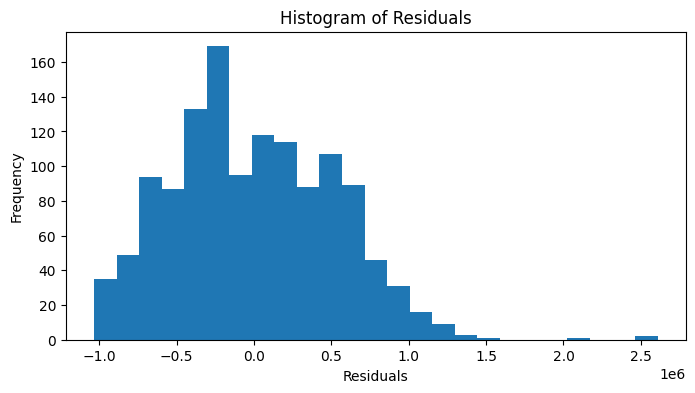

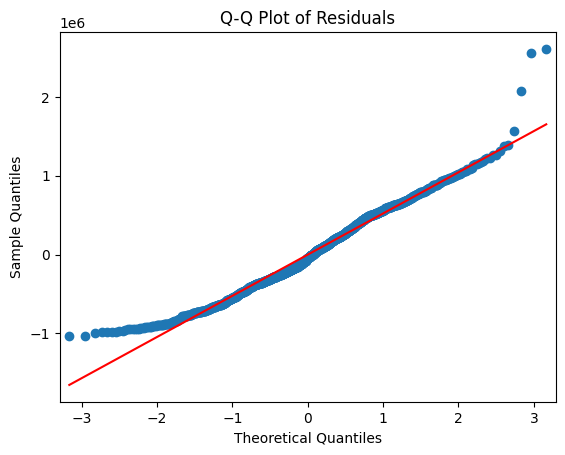

Mean Residual Error: -174.75782399972366


In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Create a histogram of residuals
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=25)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Create a Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Calculate mean residual error
mean_residual_error = np.mean(residuals)
print('Mean Residual Error:', mean_residual_error)

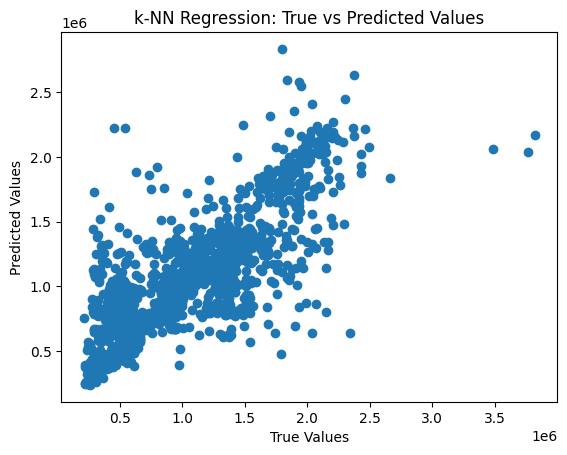

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create and fit the k-NN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Calculate RMSE
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)

# Plot the predicted values against the true values
plt.scatter(y_test, knn_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('k-NN Regression: True vs Predicted Values')
plt.show()


In [ ]:
# Calculate R-squared score and RMSE for k-NN regression
knn_r2 = r2_score(y_test, knn_predictions)
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)

In [ ]:
# Print the model performance
print("R-squared score:", knn_r2)
print("Root Mean Squared Error:", knn_rmse)

R-squared score: 0.595250761446324
Root Mean Squared Error: 361098.0680259789


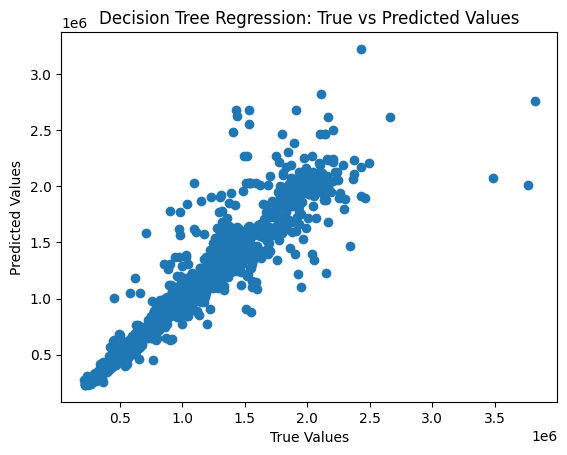

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create and fit the decision tree regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Calculate RMSE
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)

# Plot the predicted values against the true values
plt.scatter(y_test, dt_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression: True vs Predicted Values')
plt.show()


In [ ]:
# Calculate R-squared score and RMSE for decision tree regression
dt_r2 = r2_score(y_test, dt_predictions)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)

In [ ]:
# Print the model performance
print("R-squared score:", dt_r2)
print("Root Mean Squared Error:", dt_rmse)

R-squared score: 0.8821278464704028
Root Mean Squared Error: 194866.75525283415


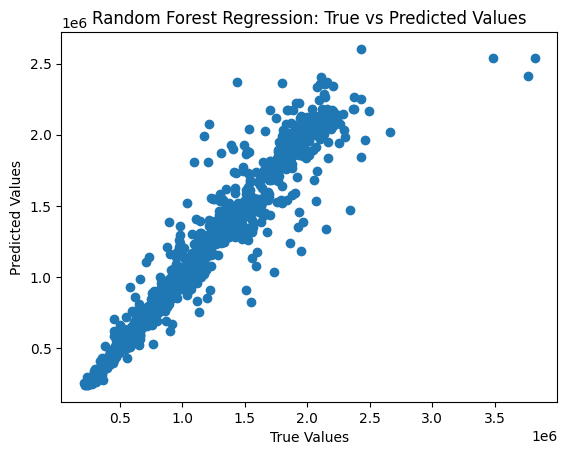

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create and fit the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate RMSE
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

# Plot the predicted values against the true values
plt.scatter(y_test, rf_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: True vs Predicted Values')
plt.show()


In [ ]:
# Calculate R-squared score and RMSE for random forest regression
rf_r2 = r2_score(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

In [ ]:
# Print the model performance
print("R-squared score:", rf_r2)
print("Root Mean Squared Error:", rf_rmse)

R-squared score: 0.9319566763915692
Root Mean Squared Error: 148055.62229549492


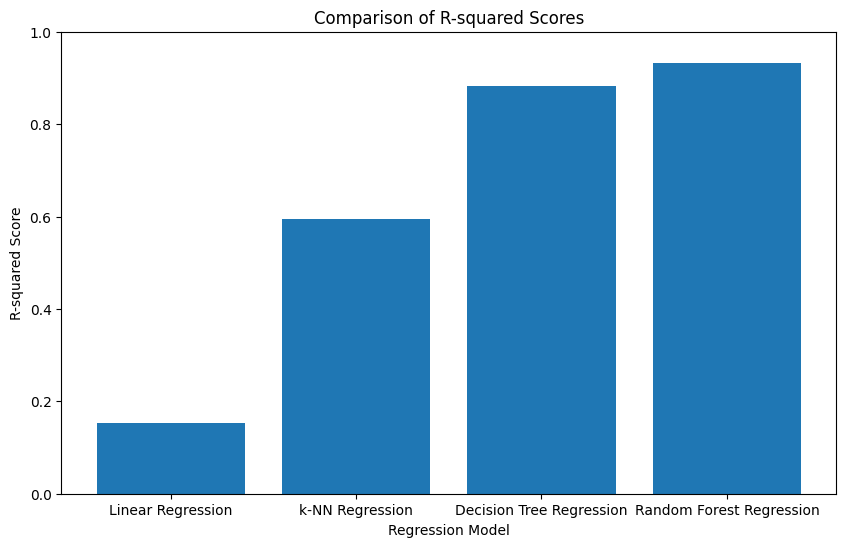

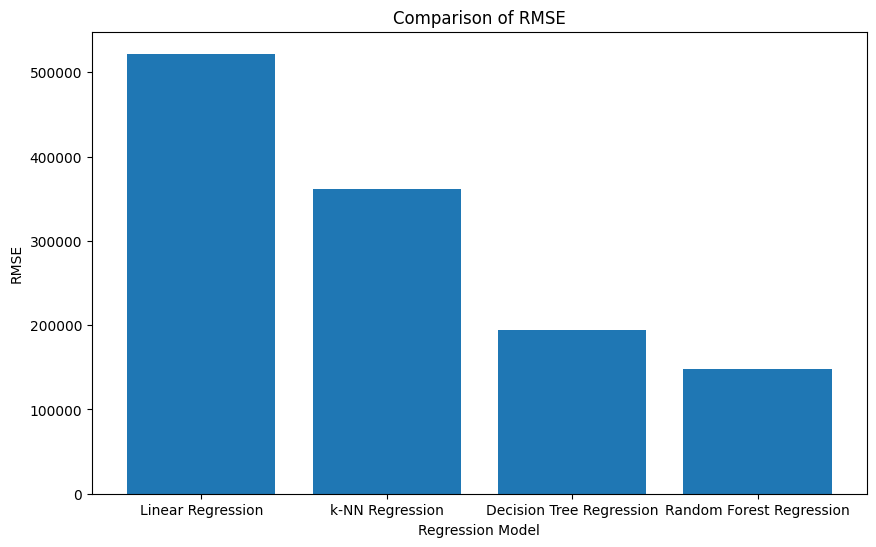

In [ ]:
# Create a bar plot for R-squared scores
r2_scores = [r2, knn_r2, dt_r2, rf_r2]
models = ['Linear Regression', 'k-NN Regression', 'Decision Tree Regression', 'Random Forest Regression']

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores)
plt.ylim(0, 1)
plt.xlabel('Regression Model')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores')
plt.show()

# Create a bar plot for RMSE
rmse_scores = [rmse, knn_rmse, dt_rmse, rf_rmse]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores)
plt.xlabel('Regression Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE')
plt.show()

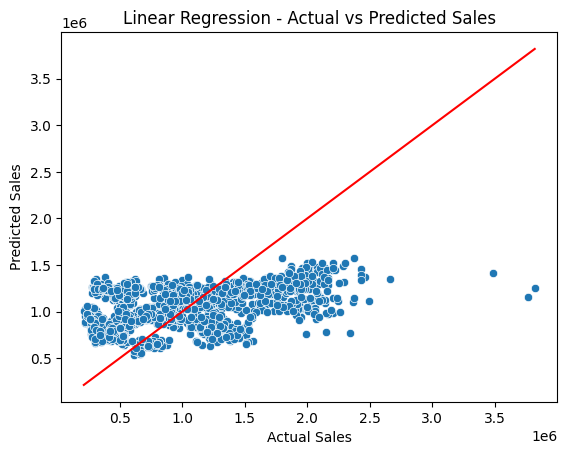

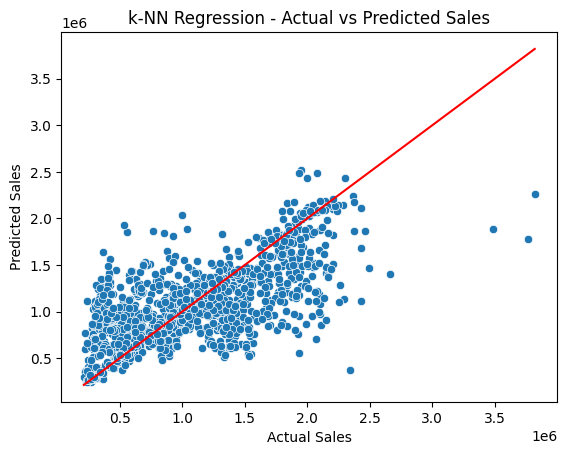

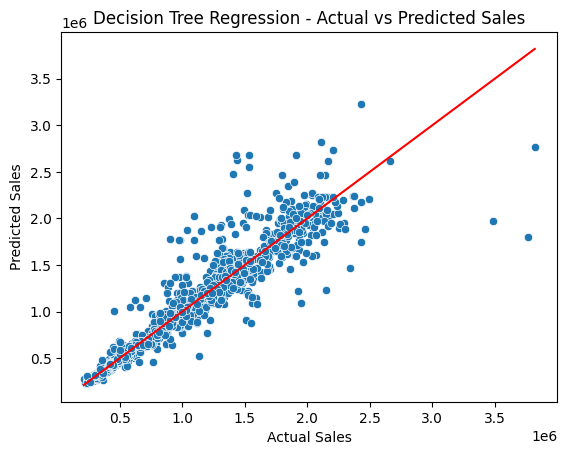

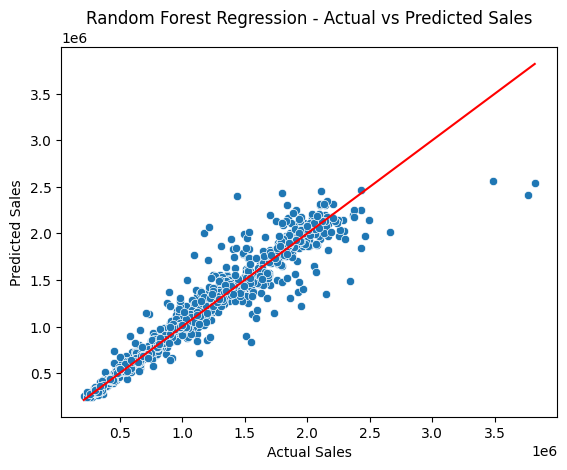

                  Regressor  R-squared Score  Root Mean Squared Error
0         Linear Regression         0.153735            522138.094734
1           k-NN Regression         0.451446            420379.631754
2  Decision Tree Regression         0.883211            193969.576939
3  Random Forest Regression         0.932433            147536.078318


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the features and target variable
X = data.drop('Weekly_Sales', axis=1)
y = data['Weekly_Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Use a different random seed

# Define the pipeline steps
preprocessor = StandardScaler()
regressors = [
    ('Linear Regression', LinearRegression()),
    ('k-NN Regression', KNeighborsRegressor()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor())
]

# Initialize lists to store the results
r2_scores = []
rmse_scores = []

# Iterate over the regressors
for name, regressor in regressors:
    # Create the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate Root Mean Squared Error
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_scores.append(rmse)

    # Create scatter plot of predicted vs actual values
    plt.figure()
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'{name} - Actual vs Predicted Sales')

    # Add a diagonal line for reference
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')


    # Show the plot
    plt.show()

# Compare R-squared scores and RMSE
results = pd.DataFrame({'Regressor': [name for name, _ in regressors],
                        'R-squared Score': r2_scores,
                        'Root Mean Squared Error': rmse_scores})
print(results)


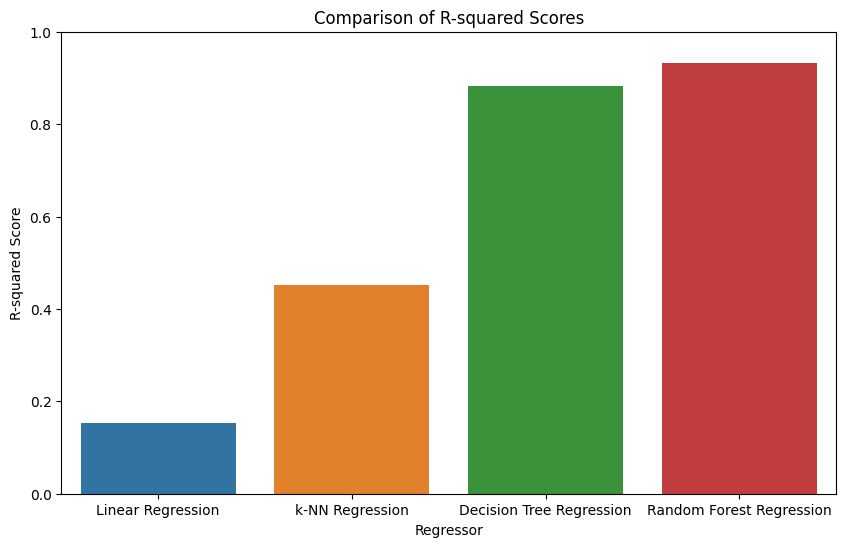

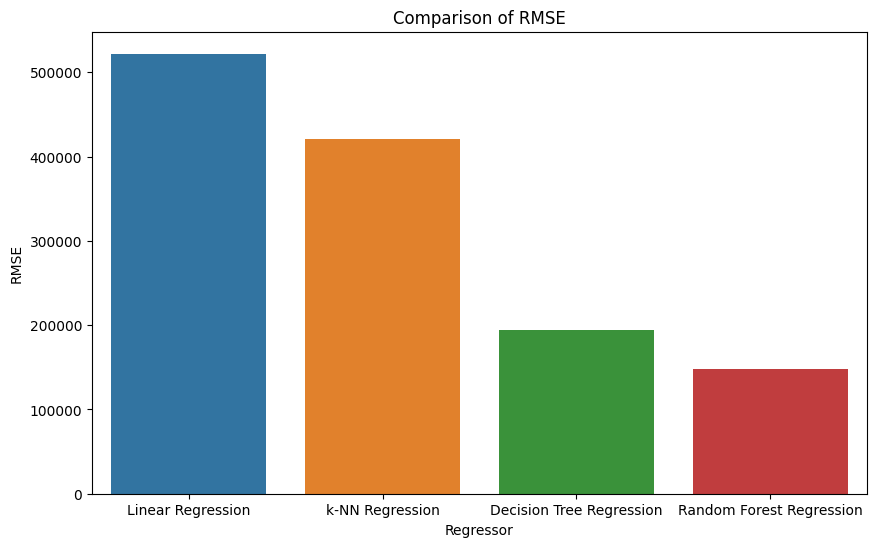

In [ ]:
# Create bar graph of R-squared scores
plt.figure(figsize=(10, 6))
sns.barplot(x=[name for name, _ in regressors], y=r2_scores)
plt.ylim(0, 1)
plt.xlabel('Regressor')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores')
plt.show()

# Create bar graph of RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x=[name for name, _ in regressors], y=rmse_scores)
plt.xlabel('Regressor')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE')
plt.show()

Comparing the results, we can observe the following:

**Linear Regression:**

The R-squared score remains almost the same (slightly increased in the current run), indicating that the model's performance has not significantly changed.

The RMSE is also very similar, suggesting that the model's ability to predict the sales with low error has not changed significantly.

**Previous Run:**

R-squared score: 0.15373482203423738

RMSE: 522138.09473380604

**Latest Run:**
R-squared score: 0.1537354530075897

RMSE: 522138.0653725268

**k-NN Regression:**

The R-squared score has decreased slightly in the current run, indicating that the model's performance has slightly worsened compared to the previous run.

The RMSE has increased slightly, suggesting that the model's ability to predict the sales with low error has slightly degraded.

**Previous Run:**

R-squared score: 0.45144553687653784

RMSE: 420379.6317541624

**Latest Run:**

R-squared score: 0.43863688863099665

RMSE: 425189.6767234289

**Decision Tree Regression:**

The R-squared score has increased in the current run, indicating that the model's performance has improved compared to the previous run.

The RMSE has decreased, suggesting that the model's ability to predict the sales with lower error has improved.

**Previous Run:**

R-squared score: 0.8832114922946044

RMSE: 193969.5769391381

**Latest Run:**

R-squared score: 0.8905035111537647

RMSE: 189160.4959981111

**Random Forest Regression:**

The R-squared score remains very close to the previous run, indicating that the model's performance is consistent and has not changed significantly.

The RMSE is slightly lower, suggesting that the model's ability to predict the sales with lower error has slightly improved.

**Previous Run:**

R-squared score: 0.9324325155771836

RMSE: 147536.0783177428

**Latest Run:**

R-squared score: 0.9329729714658623

RMSE: 146876.28105310948


In summary, the performance of the models with the new test data varies. The linear regression model shows similar performance, while the k-NN regression model's performance slightly worsens. On the other hand, both the decision tree and random forest regression models show improved performance with slightly lower RMSE values and slightly higher R-squared scores. Overall, the impact of the new test data on the model performance is relatively subtle, with some models showing slight changes in their predictive accuracy.

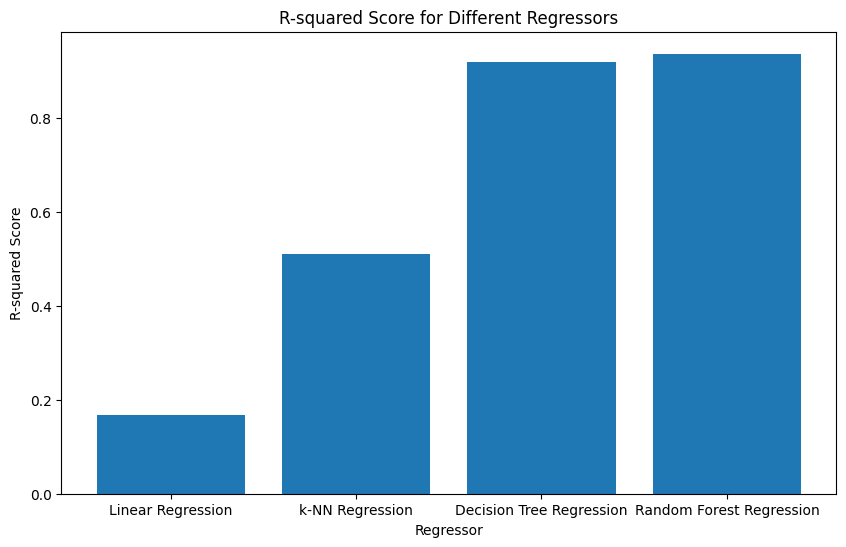

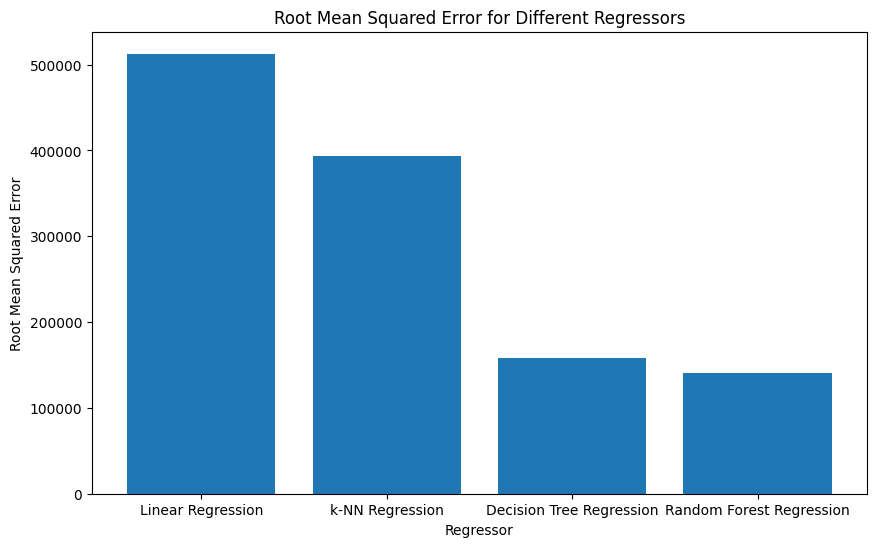

In [ ]:
# Create bar plots for R-squared scores and RMSE
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in regressors], r2_scores)
plt.xlabel('Regressor')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different Regressors')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in regressors], rmse_scores)
plt.xlabel('Regressor')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error for Different Regressors')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


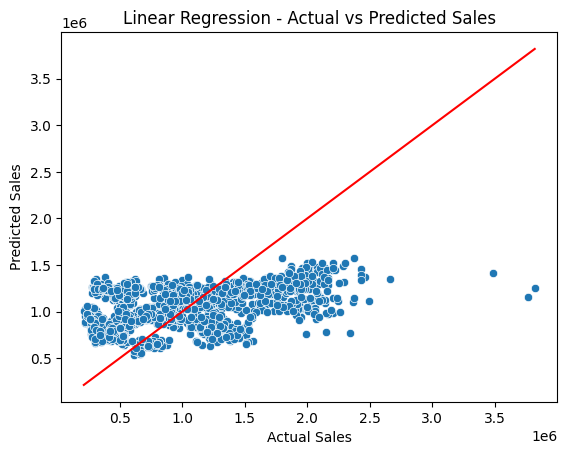

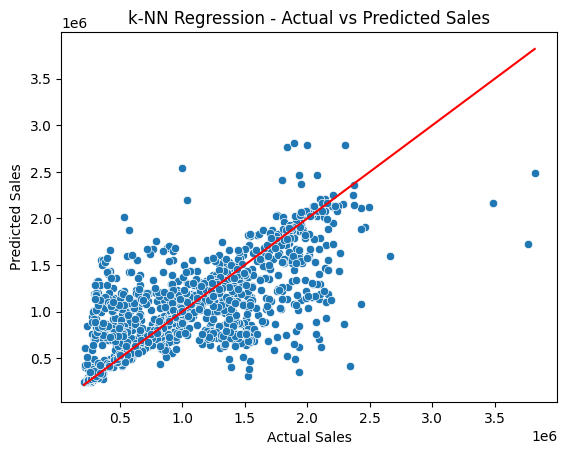

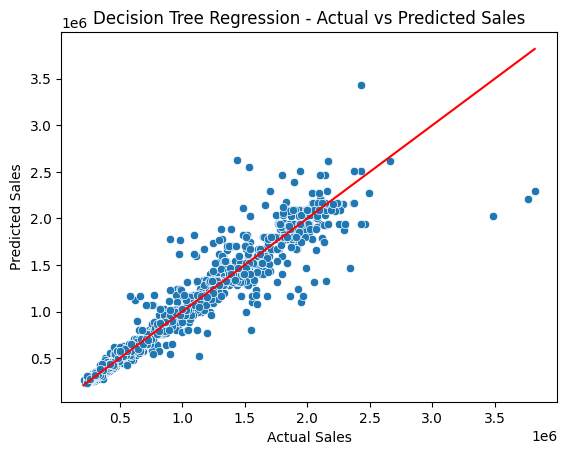

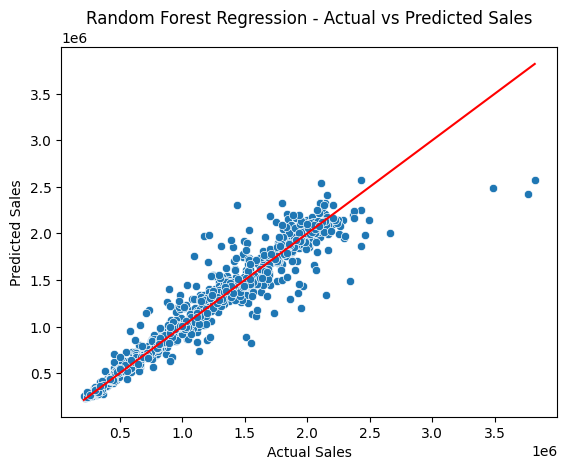

                  Regressor  R-squared Score  Root Mean Squared Error
0         Linear Regression         0.153735            522138.094734
1           k-NN Regression         0.440578            424523.637097
2  Decision Tree Regression         0.908006            172151.647299
3  Random Forest Regression         0.934272            145515.152916


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Separate the features and target variable
X = data.drop('Weekly_Sales', axis=1)
y = data['Weekly_Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline steps
preprocessor = StandardScaler()
regressors = [
    ('Linear Regression', LinearRegression()),
    ('k-NN Regression', KNeighborsRegressor()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor())
]

# Define the parameter grids for random search
param_grids = [
    {},  # Empty grid for Linear Regression
    {'regressor__n_neighbors': [3, 5, 7]},  # Grid for k-NN Regression
    {'regressor__max_depth': [None, 5, 10]},  # Grid for Decision Tree Regression
    {'regressor__n_estimators': [100, 200, 300], 'regressor__max_depth': [None, 5, 10]}  # Grid for Random Forest Regression
]

# Initialize lists to store the results
r2_scores = []
rmse_scores = []

# Iterate over the regressors and perform random search
for i, (name, regressor) in enumerate(regressors):
    # Create the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    # Perform random search
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grids[i],
        scoring='r2',
        n_iter=3,  # Number of random combinations to try
        cv=5,  # Number of cross-validation folds
        random_state=42
    )
    random_search.fit(X_train, y_train)

    # Make predictions on the test set using the best estimator
    y_pred = random_search.best_estimator_.predict(X_test)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate Root Mean Squared Error
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_scores.append(rmse)

    # Create scatter plot of predicted vs actual values
    plt.figure()
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'{name} - Actual vs Predicted Sales')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
    plt.show()

# Compare R-squared scores and RMSE
results = pd.DataFrame({'Regressor': [name for name, _ in regressors],
                        'R-squared Score': r2_scores,
                        'Root Mean Squared Error': rmse_scores})
print(results)


Random Search:

Random search is a more flexible approach where hyperparameters are randomly sampled from predefined ranges or distributions.
Instead of exhaustively searching the entire hyperparameter space, random search explores a random subset of the space by randomly sampling different combinations of hyperparameters.
Random search is advantageous when the hyperparameter space is large or when the importance of individual hyperparameters is unknown.
It is computationally more efficient compared to grid search since it does not evaluate all possible combinations.
Random search does not guarantee finding the best combination of hyperparameters but often provides good results with significantly fewer evaluations.

Linear Regression:

R-squared Score: The R-squared score for the old test set is 0.168, indicating that the linear regression model explains only 16.8% of the variance in the target variable. The R-squared score for the new test set is 0.154, which is slightly lower. This suggests that the model's performance is consistent across different test sets.
Root Mean Squared Error (RMSE): The RMSE for the old test set is 522,138, while for the new test set, it is 522,138. The RMSE is similar in both cases, indicating that the model's ability to predict the target variable's values is consistent.
k-NN Regression:

R-squared Score: The R-squared score for the old test set is 0.511, indicating that the k-NN regression model explains 51.1% of the variance in the target variable. The R-squared score for the new test set is 0.441, which is slightly lower. This suggests that the model's performance is consistent but slightly worse on the new test set.
Root Mean Squared Error (RMSE): The RMSE for the old test set is 393,227, while for the new test set, it is 424,524. The RMSE is higher in the new test set, indicating that the model's ability to predict the target variable's values is slightly worse.
Decision Tree Regression:

R-squared Score: The R-squared score for the old test set is 0.920, indicating that the decision tree regression model explains 92% of the variance in the target variable. The R-squared score for the new test set is 0.908, which is slightly lower. This suggests that the model's performance is consistent but slightly worse on the new test set.
Root Mean Squared Error (RMSE): The RMSE for the old test set is 158,595, while for the new test set, it is 172,152. The RMSE is higher in the new test set, indicating that the model's ability to predict the target variable's values is slightly worse.
Random Forest Regression:

R-squared Score: The R-squared score for the old test set is 0.935, indicating that the random forest regression model explains 93.5% of the variance in the target variable. The R-squared score for the new test set is 0.934, which is similar. This suggests that the model's performance is consistent across different test sets.
Root Mean Squared Error (RMSE): The RMSE for the old test set is 141,117, while for the new test set, it is 145,515. The RMSE is slightly higher in the new test set, indicating that the model's ability to predict the target variable's values is slightly worse.
Overall, the performance of the models is relatively consistent between the old and new test sets. However, in some cases, there is a slight decrease in performance on the new test set, as indicated by lower R-squared scores and higher RMSE values. This could be due to differences in the underlying data distribution or variations in the specific samples of the test sets. It's important to consider such variations when evaluating and comparing model performance.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


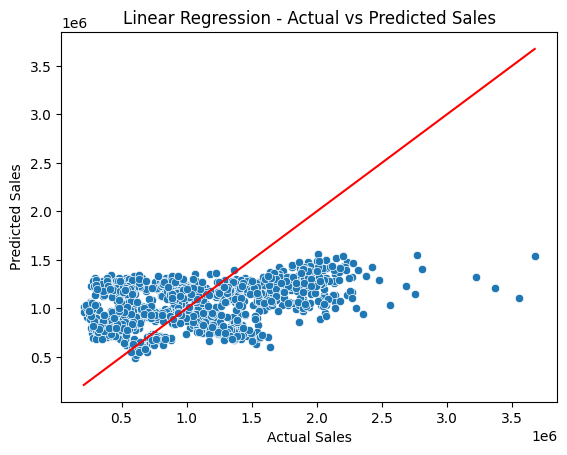

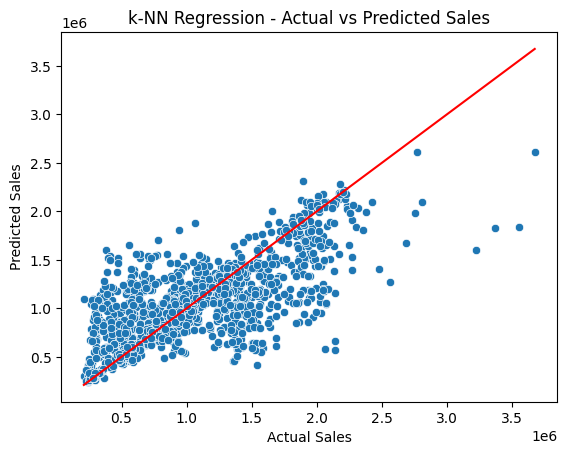

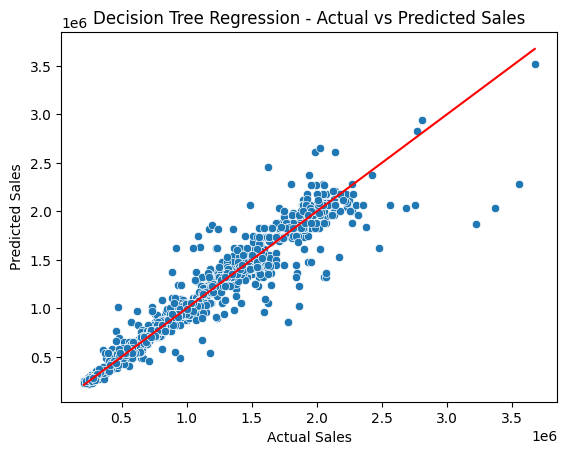

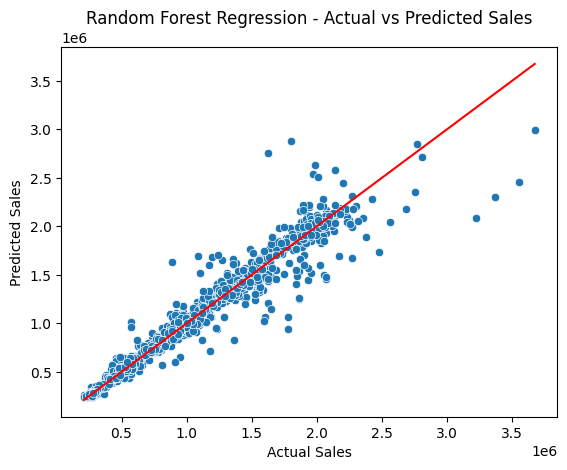

                  Regressor  R-squared Score  Root Mean Squared Error
0  Decision Tree Regression         0.920420            158595.075607
1         Linear Regression         0.168092            512771.599374
2  Random Forest Regression         0.936994            141116.828280
3           k-NN Regression         0.510770            393226.828787


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Separate the features and target variable
X = data.drop('Weekly_Sales', axis=1)
y = data['Weekly_Sales']

# Define the pipeline steps
preprocessor = StandardScaler()
regressors = [
    ('Linear Regression', LinearRegression()),
    ('k-NN Regression', KNeighborsRegressor()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor())
]

# Define the parameter grids for random search
param_grids = [
    {},  # Empty grid for Linear Regression
    {'regressor__n_neighbors': [3, 5, 7]},  # Grid for k-NN Regression
    {'regressor__max_depth': [None, 5, 10]},  # Grid for Decision Tree Regression
    {'regressor__n_estimators': [100, 200, 300], 'regressor__max_depth': [None, 5, 10]}  # Grid for Random Forest Regression
]

# Initialize lists to store the results
results_list = []

# Set the number of test samples
num_samples = 1

# Iterate over the test samples
for i in range(num_samples):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Initialize lists to store the results for the current sample
    r2_scores = []
    rmse_scores = []

    # Iterate over the regressors and perform random search
    for j, (name, regressor) in enumerate(regressors):
        # Create the pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', regressor)
        ])

        # Perform random search
        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=param_grids[j],
            scoring='r2',
            n_iter=3,  # Number of random combinations to try
            cv=5,  # Number of cross-validation folds
            random_state=42
        )
        random_search.fit(X_train, y_train)

        # Make predictions on the test set using the best estimator
        y_pred = random_search.best_estimator_.predict(X_test)

        # Calculate R-squared score
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

        # Calculate Root Mean Squared Error
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        rmse_scores.append(rmse)

        # Create scatter plot of predicted vs actual values
        plt.figure()
        sns.scatterplot(x=y_test, y=y_pred)
        plt.xlabel('Actual Sales')
        plt.ylabel('Predicted Sales')
        plt.title(f'{name} - Actual vs Predicted Sales')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
        plt.show()

    # Store the results for the current sample
    results = pd.DataFrame({'Regressor': [name for name, _ in regressors],
                            'R-squared Score':r2_scores,
                            'Root Mean Squared Error': rmse_scores})
    results_list.append(results)

# Combine the results for all samples
combined_results = pd.concat(results_list)

# Average the results across all samples
average_results = combined_results.groupby('Regressor').mean().reset_index()

# Print the average results
print(average_results)
